In [1]:
import numpy as np
import scipy as sp
from scipy.optimize import curve_fit

import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
%matplotlib inline

In [40]:
def generate_matrix(n):
    a = np.random.random_integers(-50, 50, n*n).reshape(n, n)
    return a

### Testing size complexity

In [30]:
with open('../inputs/size_test_input.txt', 'w') as outtxt:
    for i in range(1, 13):
        data = generate_matrix(i)
        print np.linalg.det(data)
        outtxt.write('{}\n'.format(i))
        outtxt.write('{}\n'.format(data).replace('[', ' ').replace(']',' '))
        outtxt.write('\n')

9.0
12.0
169.0
855.0
-11540.0
-35940.0
999485.0
493808.0
-25024182.0
-48647049.0
-46947996.0
-288402920555.0


In [3]:
def parse_input(filename):
    orders = []
    times = []
    
    for line in open(filename).readlines():
        if line.startswith('Order'):
            line = line.split()
            orders.append(line[1])
            times.append(line[3].rstrip('ns'))
            
    orders = np.array(map(int, orders))
    times = map(int, times)
    times = np.array([item/(10.**9) for item in times])
    
    indx = np.argsort(orders)
    orders = orders[indx]
    times = times[indx]
    
    return orders[:-1], times[:-1]

In [4]:
def exp_func(x, a, b, c):
    return a*10**(b*np.array(x)) + c

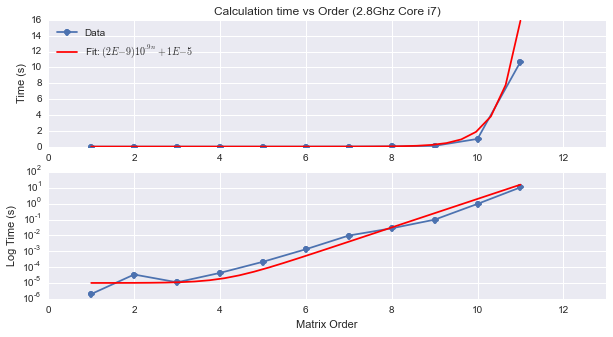

In [14]:
fig = plt.figure(figsize=(10, 5))

orders, times = parse_input("../output/size_test_output.txt")
xvals = np.linspace(min(orders), max(orders), 30)
p0=[2e-9, .9, 1e-05]
popt, pcov = curve_fit(exp_func, orders, times, p0=p0)

#-- Linear plot
ax = fig.add_subplot(2, 1, 1)
ax.plot(orders, times, marker='o', label='Data')
#ax.plot(xvals, exp_func(xvals, *popt), color='y')
ax.plot(xvals, exp_func(xvals, *p0), color='r', label='Fit: $(2E-9)10^{.9n} + 1E-5$')
ax.set_title("Calculation time vs Order (2.8Ghz Core i7)")
ax.set_ylabel("Time (s)")
ax.set_xlim(0, 13)
ax.legend(shadow=True, numpoints=1, loc='best')
#-- Log plot

ax2 = fig.add_subplot(2, 1, 2)
ax2.semilogy(orders, times, marker='o')
#ax2.semilogy(xvals, exp_func(xvals, *popt), color='y')
ax2.semilogy(xvals, exp_func(xvals, *p0), color='r')
ax2.set_ylabel("Log Time (s)")
ax2.set_xlim(0, 13)
ax2.set_xlabel("Matrix Order")

fig.savefig('time_complexity.pdf')

### Storage requirement

In [3]:
def recursion_size(n):
    if n == 1:
        return 1
    else:
        return n*n + recursion_size(n-1)

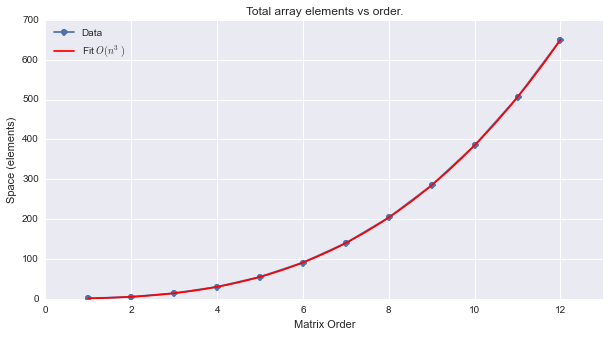

In [39]:
fig = plt.figure(figsize=(10, 5))

orders = range(1, 13)
spaces = map(recursion_size, orders)
xvals = np.linspace(min(orders), max(orders), 30)
pars = sp.polyfit(orders, spaces, 3)
yvals = sp.polyval(pars, xvals)

#-- Linear plot
ax = fig.add_subplot(1, 1, 1)
ax.plot(orders, spaces, marker='o', label='Data')
ax.plot(xvals, yvals, color='r', label='Fit $O(n^3)$')
ax.set_title("Total array elements vs order.")
ax.set_ylabel("Space (elements)")
ax.set_xlabel("Matrix Order")
ax.set_xlim(0, max(orders)+1)
ax.legend(shadow=True, numpoints=1, loc='best')

fig.savefig('space_complexity.pdf')

In [36]:
pars

array([  3.33333333e-01,   5.00000000e-01,   1.66666667e-01,
        -2.35388941e-12])

In [46]:
with open('../inputs/random_input.txt', 'w') as outtxt:
    for i in range(1, 50):
        data = generate_matrix((i%9) + 1)
        outtxt.write('{}\n'.format((i%9) + 1))
        outtxt.write('{}\n'.format(data).replace('[', ' ').replace(']',' '))
        outtxt.write('\n')

In [8]:
ls ../output/

u'/Users/ely/codebase/classwork/JHU/615.202.81.FA15_data_structures/module_08/analysis'